# Neural Network for Spiral Data Classification

Implementation of a neural network to classify spiral data points into three classes (red, green, blue) using TensorFlow/Keras.

## 1. Import Required Libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Generate Spiral Data

In [51]:
# Function to generate spiral data
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        ix = range(n_points * class_number, n_points * (class_number + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([class_number] * n_points)
    return np.array(X), np.array(y)



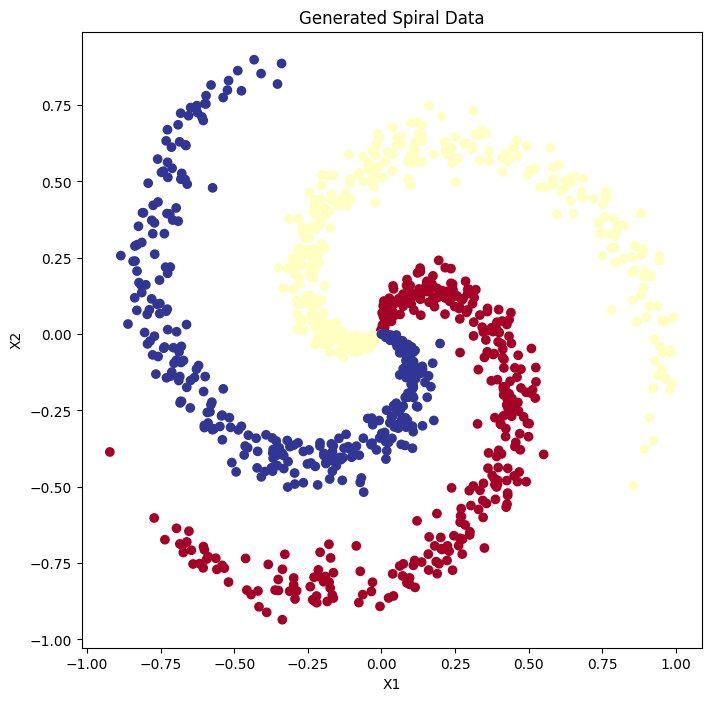

In [52]:
#generate spiral data

X,y=generate_spiral_data(333,3)

# Plot the generated data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Generated Spiral Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## 3. Train-Test Split and Data Preprocessing

In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Convert labels to one-hot encoded format
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=3)

## 4. Define Neural Network Architecture

In [60]:
# Create the model
model = Sequential()
model.add(Dense(64,input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))




In [61]:
# Compile the model
#model.compile(optimizer=tf.keras.optimizers.SGD() , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 5. Model Training

In [62]:
# Train the model
history = model.fit(x=X_train_scaled, y=y_train_onehot,
                   validation_data=(X_test_scaled, y_test_onehot),
                   epochs=50, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4443 - loss: 0.9964 - val_accuracy: 0.5150 - val_loss: 0.9015
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4443 - loss: 0.9964 - val_accuracy: 0.5150 - val_loss: 0.9015
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 0.8601 - val_accuracy: 0.5450 - val_loss: 0.7747
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5269 - loss: 0.8601 - val_accuracy: 0.5450 - val_loss: 0.7747
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5519 - loss: 0.7558 - val_accuracy: 0.5550 - val_loss: 0.6865
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5519 - loss: 0.7558 - val_accuracy: 0.5550 - val_loss: 0.6865
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5632 - loss: 0.6889 - val_accuracy: 0.6000 - val_loss: 0.6359
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5632 - loss: 0.6889 - val_accuracy: 0.6000 - val_los

## 6. Model Evaluation and Visualization

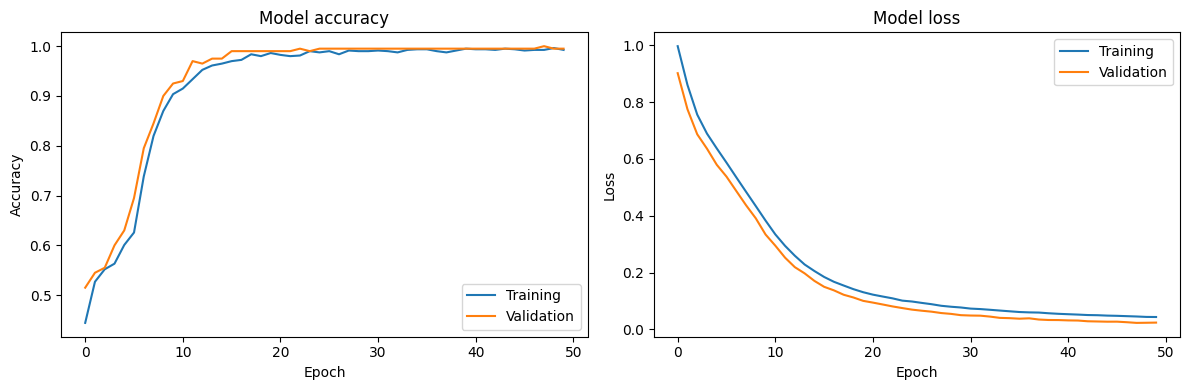

In [63]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()



## 7. Test with New Points

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


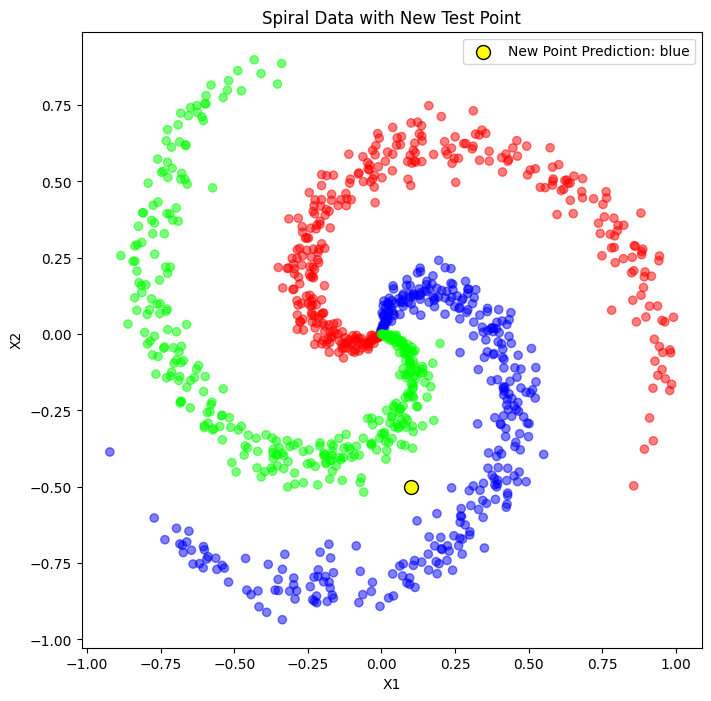

In [66]:
# Test a new point
new_point = np.array([[0.1, -0.5]])  # Updated coordinates to match the video
new_point_scaled = scaler.transform(new_point)
new_pred = np.argmax(model.predict(new_point_scaled), axis=1)

# Color map for legend
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the new test point prediction
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', alpha=0.5)
plt.scatter(new_point[:, 0], new_point[:, 1], c='yellow', edgecolors='black', s=100, label=f'New Point Prediction: {color_map[new_pred[0]]}')
plt.title('Spiral Data with New Test Point')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## 8. Compare Different Optimizers

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


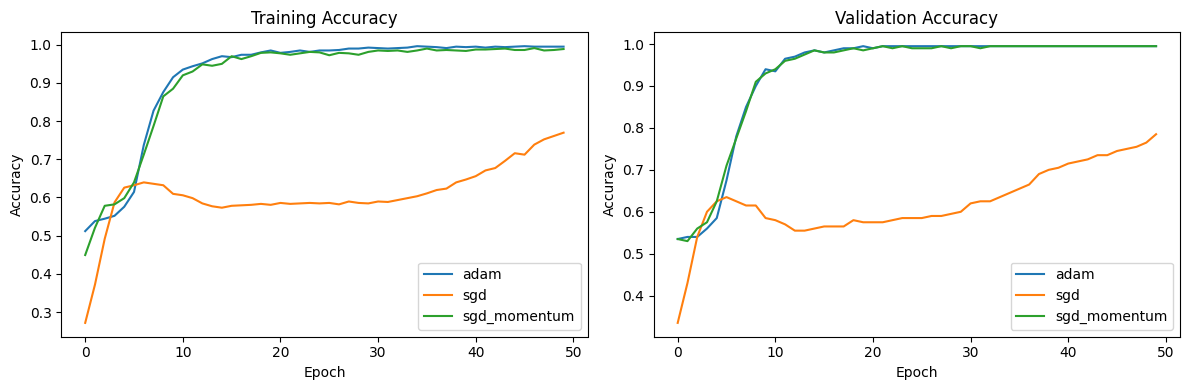

In [65]:
# Function to create and train model with different optimizers
def train_with_optimizer(optimizer_name):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(2,)),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    if optimizer_name == 'sgd':
        optimizer = 'sgd'
    elif optimizer_name == 'sgd_momentum':
        optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    else:
        optimizer = 'adam'
        
    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    history = model.fit(X_train_scaled, y_train_onehot,
                       epochs=50,
                       batch_size=32,
                       validation_data=(X_test_scaled, y_test_onehot),
                       verbose=0)
    return history

# Train with different optimizers
optimizers = ['adam', 'sgd', 'sgd_momentum']
histories = {opt: train_with_optimizer(opt) for opt in optimizers}

# Plot comparison
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
for opt in optimizers:
    plt.plot(histories[opt].history['accuracy'], label=opt)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
for opt in optimizers:
    plt.plot(histories[opt].history['val_accuracy'], label=opt)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()